In [1]:
import rioxarray
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Reading the Data

In [2]:
fn = 'air.2m.gauss.1948.nc'
arr = rioxarray.open_rasterio(fn)
arr

<xarray.DataArray 'air' (time: 1464, y: 94, x: 192)>
[26422272 values with dtype=float32]
Coordinates:
  * time         (time) object 1948-01-01 00:00:00 ... 1948-12-31 18:00:00
  * x            (x) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * y            (y) float64 88.54 86.64 84.73 82.83 ... -84.73 -86.64 -88.54
    spatial_ref  int64 0
Attributes: (12/37)
    lat#actual_range:         [ 88.542 -88.542]
    lat#axis:                 Y
    lat#long_name:            Latitude
    lat#standard_name:        latitude
    lat#units:                degrees_north
    lon#actual_range:         [  0.    358.125]
    ...                       ...
    units:                    ('degK', 'degK', 'degK', 'degK', 'degK', 'degK'...
    valid_range:              [150. 400.]
    var_desc:                 Air temperature
    _FillValue:               -9.96921e+36
    scale_factor:             1.0
    add_offset:               0.0

## Data Pre-processing

In [3]:
arr.dtype

dtype('float32')

In [4]:
# replace _FillValue with nan
arr = arr.where(arr != -9.96921e+36)
arr

<xarray.DataArray 'air' (time: 1464, y: 94, x: 192)>
array([[[226. , 225.9, 225.8, ..., 226.2, 226. , 226. ],
        [227.7, 227.9, 228.1, ..., 227.3, 227.4, 227.5],
        [230.8, 231.2, 231.5, ..., 230.3, 230.5, 230.7],
        ...,
        [258. , 258.3, 258.6, ..., 256.7, 257.2, 257.7],
        [258.7, 258.7, 258.8, ..., 258.4, 258.5, 258.6],
        [258.1, 258.1, 258.1, ..., 258.1, 258.1, 258.1]],

       [[224.3, 224.2, 224.1, ..., 224.5, 224.4, 224.3],
        [225.9, 226.2, 226.4, ..., 225.6, 225.7, 225.8],
        [229.7, 230.1, 230.3, ..., 229.5, 229.6, 229.6],
        ...,
        [259.8, 260. , 260.2, ..., 259.2, 259.4, 259.6],
        [259.2, 259.3, 259.4, ..., 259.1, 259.1, 259.2],
        [258.2, 258.2, 258.2, ..., 258.2, 258.2, 258.2]],

       [[228. , 228. , 228. , ..., 228.1, 228.1, 228. ],
        [227. , 227.3, 227.7, ..., 226.2, 226.5, 226.7],
        [228.7, 229. , 229.3, ..., 228.1, 228.3, 228.5],
        ...,
...
        ...,
        [256.4, 256.4, 256.4, ..., 256.5, 256.5, 256.4],
        [256.3, 256.3, 256.2, ..., 256.6, 256.5, 256.4],
        [256.1, 256.1, 256.1, ..., 256.3, 256.2, 256.2]],

       [[226.5, 226.7, 226.8, ..., 226.1, 226.2, 226.4],
        [227. , 227. , 227. , ..., 226.9, 226.9, 226.9],
        [230.7, 230.7, 230.8, ..., 230.9, 230.8, 230.7],
        ...,
        [256.8, 256.8, 256.8, ..., 257. , 256.9, 256.9],
        [256.6, 256.5, 256.4, ..., 256.9, 256.8, 256.7],
        [256.3, 256.2, 256.2, ..., 256.4, 256.4, 256.3]],

       [[225.1, 225.2, 225.4, ..., 224.7, 224.8, 225. ],
        [225.3, 225.3, 225.2, ..., 225.5, 225.4, 225.3],
        [229.4, 229.3, 229.3, ..., 230. , 229.7, 229.5],
        ...,
        [256.2, 256.2, 256.2, ..., 256.1, 256.2, 256.2],
        [256.7, 256.7, 256.7, ..., 257. , 256.9, 256.8],
        [256.5, 256.7, 256.7, ..., 257. , 256.9, 256.8]]], dtype=float32)
Coordinates:
  * time         (time) object 1948-01-01 00:00:00 ... 1948-12-31 18:00:00
  * x            (x) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * y            (y) float64 88.54 86.64 84.73 82.83 ... -84.73 -86.64 -88.54
    spatial_ref  int64 0
Attributes: (12/37)
    lat#actual_range:         [ 88.542 -88.542]
    lat#axis:                 Y
    lat#long_name:            Latitude
    lat#standard_name:        latitude
    lat#units:                degrees_north
    lon#actual_range:         [  0.    358.125]
    ...                       ...
    units:                    ('degK', 'degK', 'degK', 'degK', 'degK', 'degK'...
    valid_range:              [150. 400.]
    var_desc:                 Air temperature
    _FillValue:               -9.96921e+36
    scale_factor:             1.0
    add_offset:               0.0

In [5]:
# check if the data is within the valid range
((arr <= 150) & (arr >= 400)).sum()

<xarray.DataArray 'air' ()>
array(0)
Coordinates:
    spatial_ref  int64 0

In [6]:
# define a new dimension for year 
n = [1948]
new_time = range(len(arr.time))
ind = pd.MultiIndex.from_product([n, new_time], names=['year', 'new_time'])
arr_new = arr.assign_coords(time=ind).unstack('time')
arr_new = arr_new.rename({'new_time':'time'})
arr_new

<xarray.DataArray 'air' (y: 94, x: 192, year: 1, time: 1464)>
array([[[[226. , 224.3, 228. , ..., 228.6, 226.5, 225.1]],

        [[225.9, 224.2, 228. , ..., 228.7, 226.7, 225.2]],

        [[225.8, 224.1, 228. , ..., 228.9, 226.8, 225.4]],

        ...,

        [[226.2, 224.5, 228.1, ..., 228. , 226.1, 224.7]],

        [[226. , 224.4, 228.1, ..., 228.3, 226.2, 224.8]],

        [[226. , 224.3, 228. , ..., 228.5, 226.4, 225. ]]],


       [[[227.7, 225.9, 227. , ..., 229.3, 227. , 225.3]],

        [[227.9, 226.2, 227.3, ..., 229.3, 227. , 225.3]],

        [[228.1, 226.4, 227.7, ..., 229.4, 227. , 225.2]],
...
        [[258.4, 259.1, 259.3, ..., 256.6, 256.9, 257. ]],

        [[258.5, 259.1, 259.3, ..., 256.5, 256.8, 256.9]],

        [[258.6, 259.2, 259.4, ..., 256.4, 256.7, 256.8]]],


       [[[258.1, 258.2, 258.2, ..., 256.1, 256.3, 256.5]],

        [[258.1, 258.2, 258.2, ..., 256.1, 256.2, 256.7]],

        [[258.1, 258.2, 258.2, ..., 256.1, 256.2, 256.7]],

        ...,

        [[258.1, 258.2, 258.2, ..., 256.3, 256.4, 257. ]],

        [[258.1, 258.2, 258.2, ..., 256.2, 256.4, 256.9]],

        [[258.1, 258.2, 258.2, ..., 256.2, 256.3, 256.8]]]], dtype=float32)
Coordinates:
  * year         (year) int64 1948
  * time         (time) int64 0 1 2 3 4 5 6 ... 1458 1459 1460 1461 1462 1463
  * x            (x) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * y            (y) float64 88.54 86.64 84.73 82.83 ... -84.73 -86.64 -88.54
    spatial_ref  int64 0
Attributes: (12/37)
    lat#actual_range:         [ 88.542 -88.542]
    lat#axis:                 Y
    lat#long_name:            Latitude
    lat#standard_name:        latitude
    lat#units:                degrees_north
    lon#actual_range:         [  0.    358.125]
    ...                       ...
    units:                    ('degK', 'degK', 'degK', 'degK', 'degK', 'degK'...
    valid_range:              [150. 400.]
    var_desc:                 Air temperature
    _FillValue:               -9.96921e+36
    scale_factor:             1.0
    add_offset:               0.0

## Obtaining Annual Air Temprature Quantiles Over the Years 1948-2015

In [7]:
quantiles = arr_new.quantile(q=0, dim='time')
for i in range(100):
    quantiles = xr.concat([quantiles, arr_new.quantile(q=(i+1)/100, dim='time')], "quantile")
quantiles

<xarray.DataArray 'air' (quantile: 101, y: 94, x: 192, year: 1)>
array([[[[209.29998779],
         [209.29998779],
         [209.29998779],
         ...,
         [209.20001221],
         [209.20001221],
         [209.20001221]],

        [[208.3999939 ],
         [208.29998779],
         [208.20001221],
         ...,
         [209.20001221],
         [208.8999939 ],
         [208.6000061 ]],

        [[211.3999939 ],
         [211.1000061 ],
         [210.8999939 ],
         ...,
...
         ...,
         [263.3999939 ],
         [263.29998779],
         [263.3999939 ]],

        [[262.6000061 ],
         [262.5       ],
         [262.3999939 ],
         ...,
         [262.79998779],
         [262.70001221],
         [262.70001221]],

        [[261.79998779],
         [261.79998779],
         [261.70001221],
         ...,
         [262.        ],
         [262.        ],
         [261.8999939 ]]]])
Coordinates:
  * year      (year) int64 1948
  * x         (x) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * y         (y) float64 88.54 86.64 84.73 82.83 ... -84.73 -86.64 -88.54
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

In [8]:
startTime = datetime.now()

for year in range(1949, 2015):
    fn = 'air.2m.gauss.{}.nc'.format(year)
    arr = rioxarray.open_rasterio(fn)
    arr = arr.where(arr != -9.96921e+36)
    n = [year]
    new_time = range(len(arr.time))
    ind = pd.MultiIndex.from_product([n, new_time], names=['year', 'new_time'])
    arr_new = arr.assign_coords(time=ind).unstack('time')
    arr_new = arr_new.rename({'new_time':'time'})
    q = arr_new.quantile(q=0, dim='time')
    for i in range(100):
        q = xr.concat([q, arr_new.quantile(q=(i+1)/100, dim='time')], "quantile")
    quantiles = xr.concat([quantiles, q], "year")

print('Runtime: {}'.format(datetime.now() - startTime))

Runtime: 2:06:27.878940


In [9]:
quantiles

<xarray.DataArray 'air' (quantile: 101, y: 94, x: 192, year: 67)>
array([[[[209.29998779, 214.20001221, 215.1000061 , ..., 213.70001221,
          219.5       , 223.5       ],
         [209.29998779, 214.20001221, 215.1000061 , ..., 213.79998779,
          219.8999939 , 223.1000061 ],
         [209.29998779, 214.20001221, 215.20001221, ..., 213.79998779,
          219.8999939 , 222.69999695],
         ...,
         [209.20001221, 214.79998779, 214.79998779, ..., 213.5       ,
          218.1000061 , 224.        ],
         [209.20001221, 214.5       , 214.8999939 , ..., 213.6000061 ,
          218.5       , 224.19999695],
         [209.20001221, 214.29998779, 214.8999939 , ..., 213.6000061 ,
          219.        , 223.8999939 ]],

        [[208.3999939 , 211.        , 217.70001221, ..., 220.70001221,
          218.        , 220.1000061 ],
         [208.29998779, 211.        , 217.70001221, ..., 220.79998779,
          218.1000061 , 220.1000061 ],
         [208.20001221, 211.        , 217.70001221, ..., 220.8999939 ,
          218.20001221, 220.        ],
...
         [262.79998779, 262.        , 265.29998779, ..., 260.79998779,
          260.6000061 , 259.6000061 ],
         [262.70001221, 261.8999939 , 265.5       , ..., 260.79998779,
          260.70001221, 259.5       ],
         [262.70001221, 261.79998779, 265.6000061 , ..., 260.79998779,
          260.70001221, 259.3999939 ]],

        [[261.79998779, 263.        , 264.20001221, ..., 258.20001221,
          257.70001221, 258.5       ],
         [261.79998779, 263.        , 264.1000061 , ..., 258.20001221,
          257.70001221, 258.3999939 ],
         [261.70001221, 263.        , 264.1000061 , ..., 258.1000061 ,
          257.70001221, 258.3999939 ],
         ...,
         [262.        , 263.1000061 , 264.1000061 , ..., 258.29998779,
          257.70001221, 258.6000061 ],
         [262.        , 263.1000061 , 264.1000061 , ..., 258.20001221,
          257.70001221, 258.5       ],
         [261.8999939 , 263.        , 264.1000061 , ..., 258.20001221,
          257.70001221, 258.5       ]]]])
Coordinates:
  * year      (year) int64 1948 1949 1950 1951 1952 ... 2010 2011 2012 2013 2014
  * x         (x) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * y         (y) float64 88.54 86.64 84.73 82.83 ... -84.73 -86.64 -88.54
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

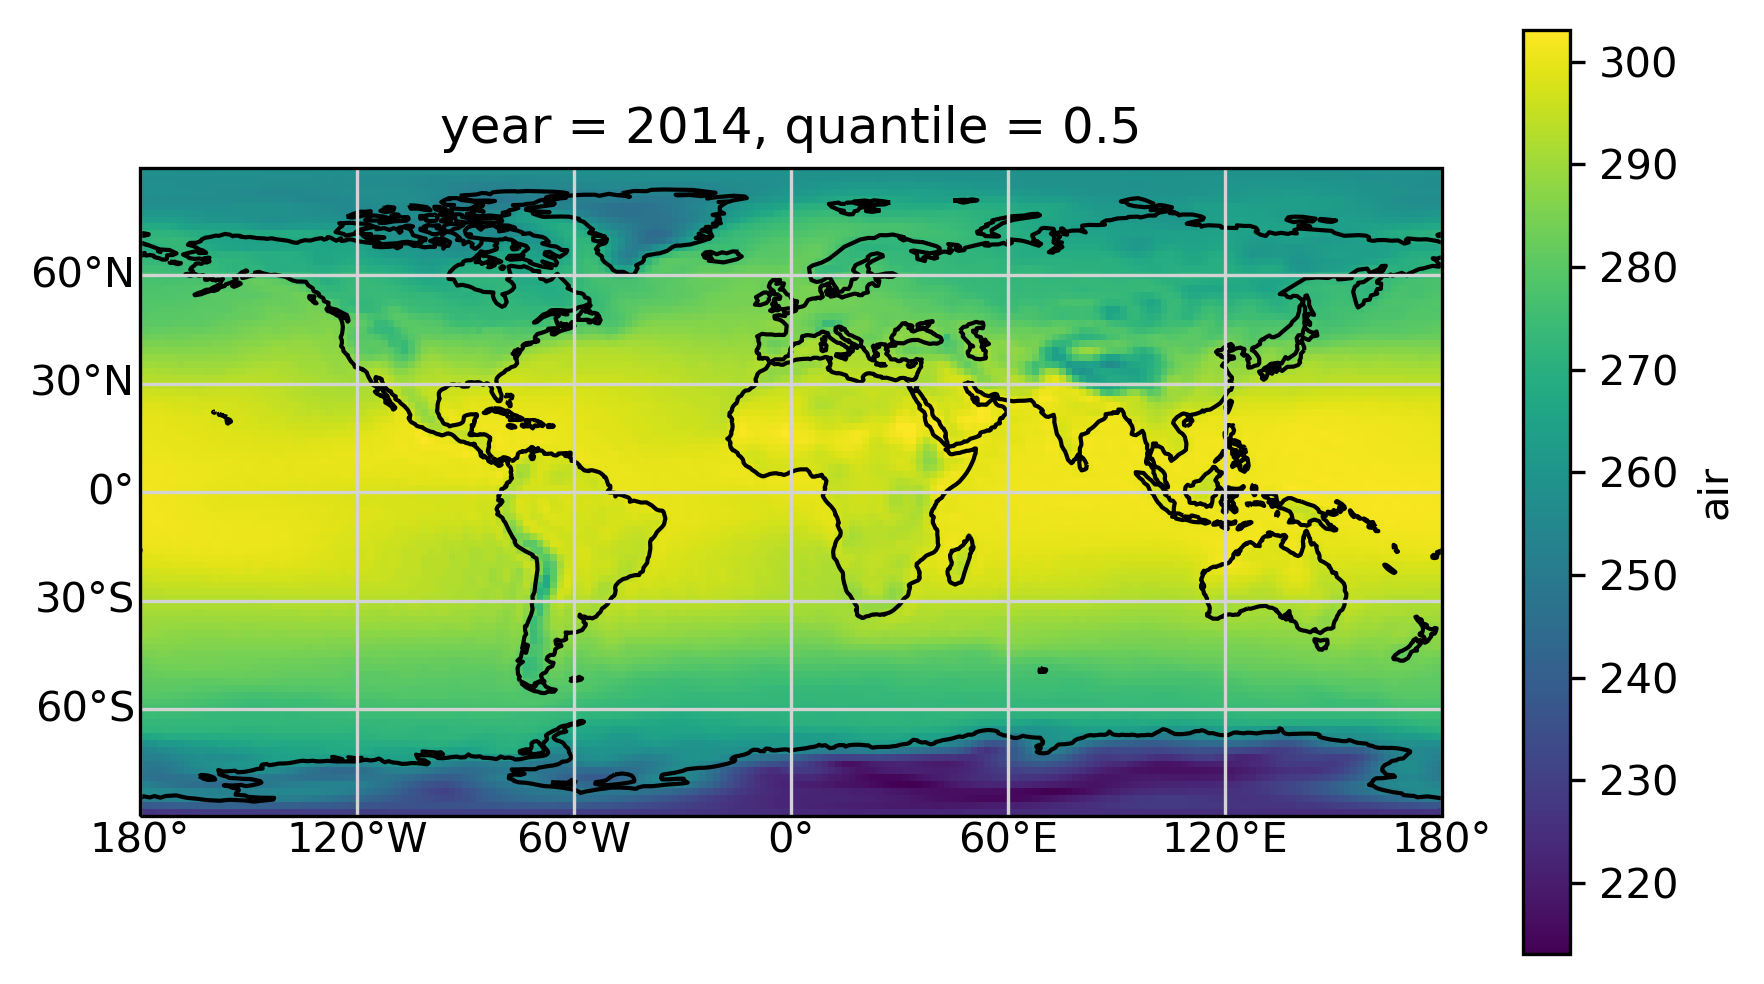

In [28]:
# heatmap - the median air temperature (q=0.5) in 2014
import cartopy.crs as ccrs
import matplotlib.colors as colors

fig = plt.figure(figsize=(7,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
quantiles[50, :, :, -1].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

# Add gridlines with labels
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
gl.top_labels = False
gl.right_labels = False

## Calculating the Annual Warming Rate of Air Temperature Quantiles

In [11]:
numYear = len(quantiles.year)
x_mean = quantiles.year.mean()
y_mean = quantiles.mean(dim='year')
S_xx = (quantiles.year * quantiles.year).sum() - numYear * x_mean * x_mean
S_xx

<xarray.DataArray 'year' ()>
array(25058.)

In [12]:
S_xy = quantiles.dot(quantiles.year) - numYear * x_mean * y_mean
S_xy

<xarray.DataArray (quantile: 101, y: 94, x: 192)>
array([[[ 2182.70921326,  2214.37817383,  2205.75022888, ...,
          2173.10133362,  2204.95109558,  2200.80108643],
        [ 2439.80102539,  2478.03015137,  2545.89958191, ...,
          2409.39932251,  2414.85028076,  2430.98294067],
        [ 2334.36160278,  2300.09907532,  2304.82948303, ...,
          2142.60174561,  2220.05891418,  2322.29811096],
        ...,
        [ 2818.39883423,  3272.29833984,  3573.49963379, ...,
          2740.70074463,  2829.42068481,  2800.51913452],
        [ 2105.4994812 ,  2078.6991272 ,  2122.82907104, ...,
          2580.69775391,  2408.14984131,  2248.40084839],
        [  266.56933594,   145.37808228,    91.16049194, ...,
           370.8001709 ,   344.87820435,   323.60137939]],

       [[ 2350.26258148,  2366.26596481,  2391.05672134, ...,
          2363.83944641,  2362.5474231 ,  2363.18203934],
        [ 2024.41208114,  2087.58271255,  2048.76049773, ...,
          2073.39090591,  2075.27087021,  2044.83984818],
        [ 1835.20652177,  1794.27599243,  1815.51668366, ...,
          1719.59222152,  1713.87979462,  1770.785271  ],
...
        [-1514.49352692, -1530.36316009, -1555.3931134 , ...,
         -1436.99645798, -1475.18448304, -1481.03073442],
        [-1657.76427734, -1667.71102509, -1691.26962053, ...,
         -1605.71788315, -1623.73260362, -1640.41063553],
        [-1763.61350968, -1764.54646317, -1784.6777597 , ...,
         -1744.71192551, -1752.53954361, -1754.9456392 ]],

       [[   60.03744507,    64.73684692,    67.03652954, ...,
            60.13864136,    60.73797607,    61.93814087],
        [   61.25149536,    58.6517334 ,    54.55123901, ...,
            45.88922119,    58.29180908,    60.04992676],
        [   89.26965332,    80.06939697,    85.96835327, ...,
            92.95904541,    92.79846191,    89.66921997],
        ...,
        [-1120.63092041, -1126.40048218, -1129.58178711, ...,
         -1144.23132324, -1136.13024902, -1116.42211914],
        [-1246.95843506, -1242.22015381, -1250.69970703, ...,
         -1219.69076538, -1223.33135986, -1230.66018677],
        [-1483.59942627, -1470.55029297, -1476.53045654, ...,
         -1464.73019409, -1475.53012085, -1480.07983398]]])
Coordinates:
  * x         (x) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * y         (y) float64 88.54 86.64 84.73 82.83 ... -84.73 -86.64 -88.54
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

In [13]:
slopes = S_xy/S_xx
slopes

<xarray.DataArray (quantile: 101, y: 94, x: 192)>
array([[[ 0.08710628,  0.08837011,  0.08802579, ...,  0.08672286,
          0.0879939 ,  0.08782828],
        [ 0.09736615,  0.09889178,  0.10160027, ...,  0.0961529 ,
          0.09637043,  0.09701424],
        [ 0.09315834,  0.09179101,  0.09197979, ...,  0.0855057 ,
          0.08859681,  0.09267691],
        ...,
        [ 0.11247501,  0.13058897,  0.14260913, ...,  0.10937428,
          0.11291486,  0.11176148],
        [ 0.08402504,  0.08295551,  0.08471662, ...,  0.10298898,
          0.09610303,  0.08972787],
        [ 0.01063809,  0.00580166,  0.00363798, ...,  0.01479768,
          0.0137632 ,  0.01291409]],

       [[ 0.0937929 ,  0.09443156,  0.09542089, ...,  0.09433472,
          0.09428316,  0.09430849],
        [ 0.08078905,  0.08331003,  0.08176074, ...,  0.08274367,
          0.0828187 ,  0.08160427],
        [ 0.07323835,  0.07160492,  0.07245258, ...,  0.06862448,
          0.06839651,  0.07066746],
...
        [-0.06043952, -0.06107284, -0.06207172, ..., -0.05734681,
         -0.0588708 , -0.05910411],
        [-0.06615709, -0.06655404, -0.0674942 , ..., -0.06408005,
         -0.06479897, -0.06546455],
        [-0.07038126, -0.07041849, -0.07122188, ..., -0.06962694,
         -0.06993932, -0.07003534]],

       [[ 0.00239594,  0.00258348,  0.00267525, ...,  0.00239998,
          0.0024239 ,  0.00247179],
        [ 0.00244439,  0.00234064,  0.002177  , ...,  0.00183132,
          0.00232628,  0.00239644],
        [ 0.00356252,  0.00319536,  0.00343077, ...,  0.00370976,
          0.00370335,  0.00357847],
        ...,
        [-0.04472148, -0.04495173, -0.04507869, ..., -0.04566331,
         -0.04534002, -0.04455352],
        [-0.04976289, -0.04957379, -0.04991219, ..., -0.04867471,
         -0.04881999, -0.04911247],
        [-0.05920662, -0.05868586, -0.05892451, ..., -0.0584536 ,
         -0.05888459, -0.05906616]]])
Coordinates:
  * x         (x) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * y         (y) float64 88.54 86.64 84.73 82.83 ... -84.73 -86.64 -88.54
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

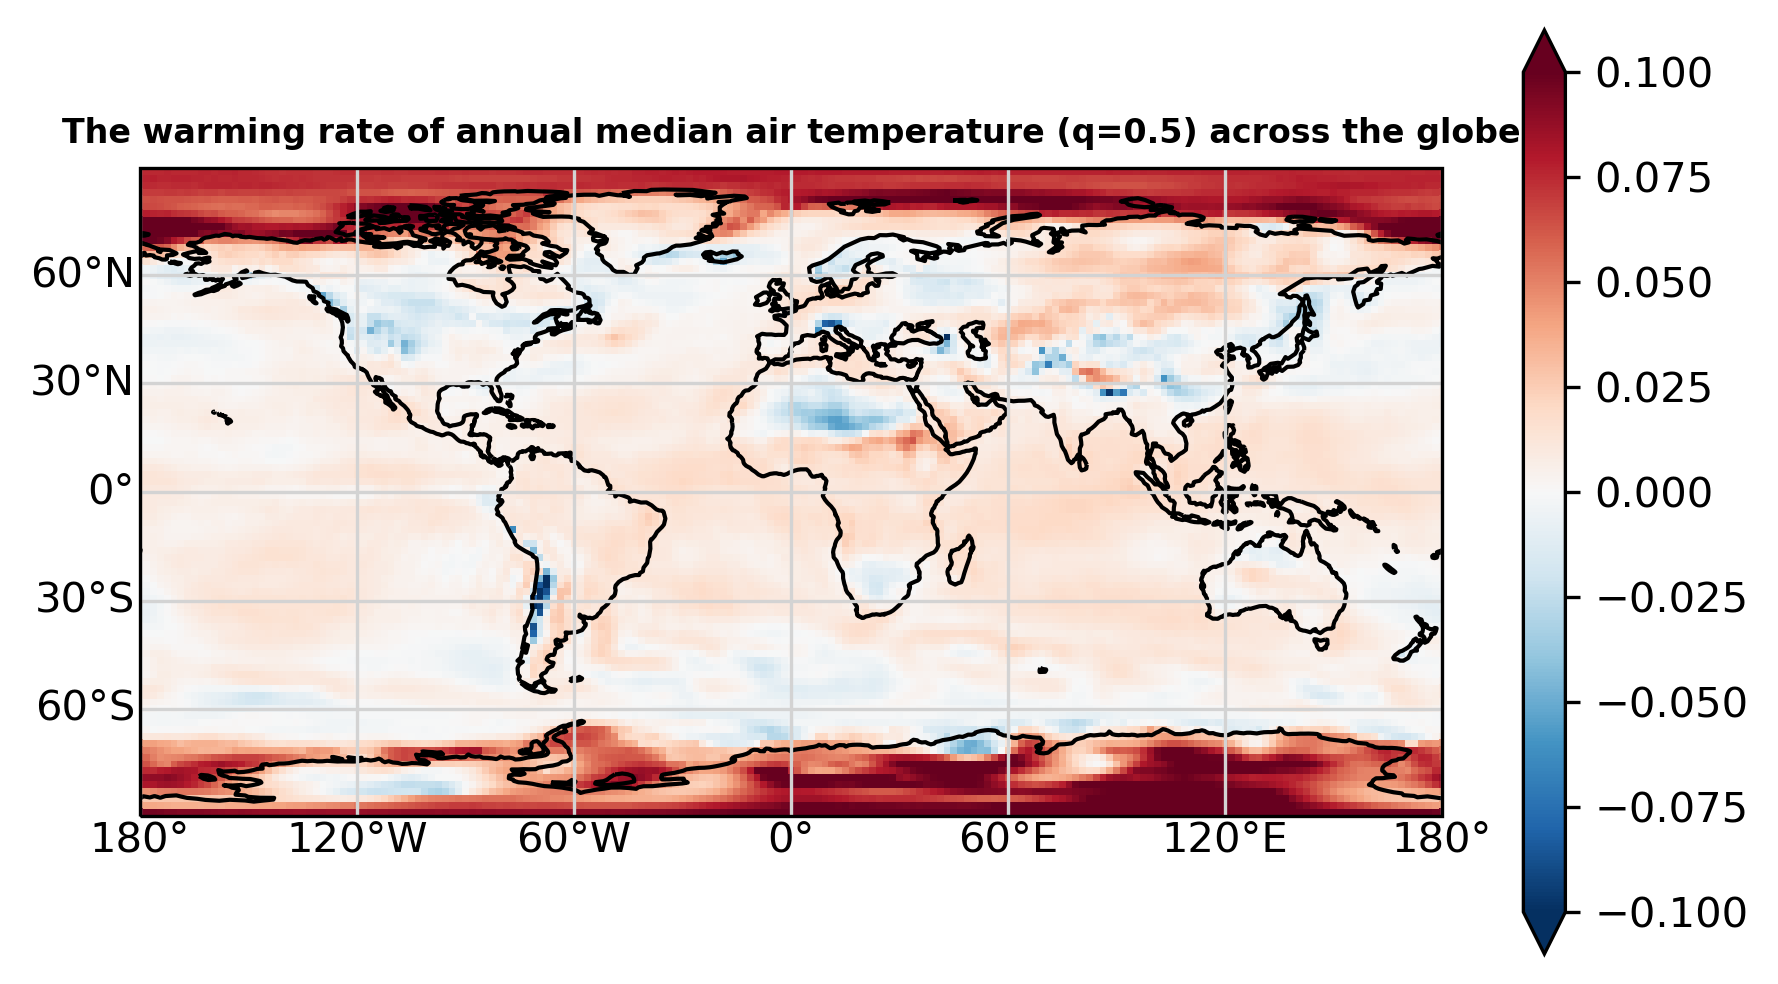

In [29]:
# heatmap - the warming rate of annual median air temperature (q=0.5) across the globe
import cartopy.crs as ccrs
import matplotlib.colors as colors

fig = plt.figure(figsize=(7,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
slopes[50, :, :].plot(ax=ax, transform=ccrs.PlateCarree(), norm=colors.Normalize(vmin=-0.1, vmax=0.1))
ax.coastlines()
plt.title('The warming rate of annual median air temperature (q=0.5) across the globe', 
          fontsize=8, fontweight='bold')

# Add gridlines with labels
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
gl.top_labels = False
gl.right_labels = False

In [15]:
stacked = slopes.stack(coord = ('y', 'x'))
coordinates = stacked.coord.to_numpy().T

In [16]:
coord = np.zeros((len(coordinates), 2))
for i in range(len(coordinates)):
    coord[i, 0] = coordinates[i][0]
    coord[i, 1] = coordinates[i][1]
    if coord[i, 1] > 180:
        coord[i, 1] -= 360

In [17]:
all_slopes = stacked.to_numpy().T
all_slopes.shape

(18048, 101)

In [18]:
df = pd.DataFrame(coord, columns=['latitude', 'longitude'])
df = df.reset_index()
df

,index,latitude,longitude
0,0,88.542,0.000
1,1,88.542,1.875
2,2,88.542,3.750
3,3,88.542,5.625
4,4,88.542,7.500
...,...,...,...
18043,18043,-88.542,-9.375
18044,18044,-88.542,-7.500
18045,18045,-88.542,-5.625
18046,18046,-88.542,-3.750


## K-Means Clustering

### Identifying the Optimal Number of Clusters using the Elbow Method

In [19]:
from sklearn.cluster import KMeans

wcss = []
for num_of_clusters in range(2, 50):
    kmeans = KMeans(n_clusters=num_of_clusters, init='random', n_init=10, max_iter=1000, tol=1e-05, random_state=0)
    kmeans.fit(all_slopes)
    labels = kmeans.fit_predict(all_slopes)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Gragh')

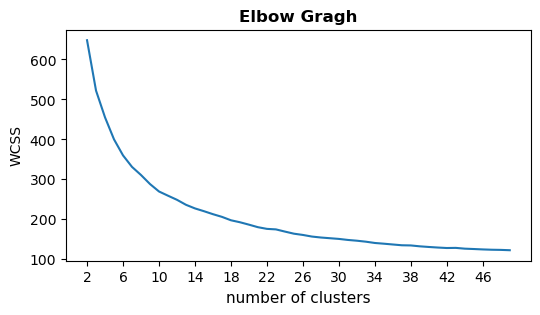

In [20]:
# plot WCSS agaianst the number of clusters
fig, ax = plt.subplots(figsize=(6, 3))
xaxis = np.arange(2, 50, 1)
ax.plot(xaxis, wcss)
ax.set_ylabel('WCSS', fontsize=10)
ax.set_xticks(np.arange(2, 50, 4))
ax.set_xlabel('number of clusters', fontsize=11)
plt.title('Elbow Gragh', fontsize=12, fontweight='bold')

### Performing Classification

In [21]:
from sklearn.cluster import KMeans
n_clusters=6
kmeans_6c = KMeans(n_clusters=n_clusters, init='random', n_init=10, max_iter=1000, tol=1e-05, random_state=4)
labels_6c = kmeans_6c.fit_predict(all_slopes)

In [22]:
df['labels_6c'] = labels_6c
df['text_6c'] = 'Cluster ' + (df['labels_6c']+1).astype(str)
df

,index,latitude,longitude,labels_6c,text_6c
0,0,88.542,0.000,2,Cluster 3
1,1,88.542,1.875,2,Cluster 3
2,2,88.542,3.750,2,Cluster 3
3,3,88.542,5.625,2,Cluster 3
4,4,88.542,7.500,2,Cluster 3
...,...,...,...,...,...
18043,18043,-88.542,-9.375,0,Cluster 1
18044,18044,-88.542,-7.500,0,Cluster 1
18045,18045,-88.542,-5.625,0,Cluster 1
18046,18046,-88.542,-3.750,0,Cluster 1


In [23]:
df1 = df.loc[df['labels_6c']==0]
df2 = df.loc[df['labels_6c']==1]
df3 = df.loc[df['labels_6c']==2]
df4 = df.loc[df['labels_6c']==3]
df5 = df.loc[df['labels_6c']==4]
df6 = df.loc[df['labels_6c']==5]

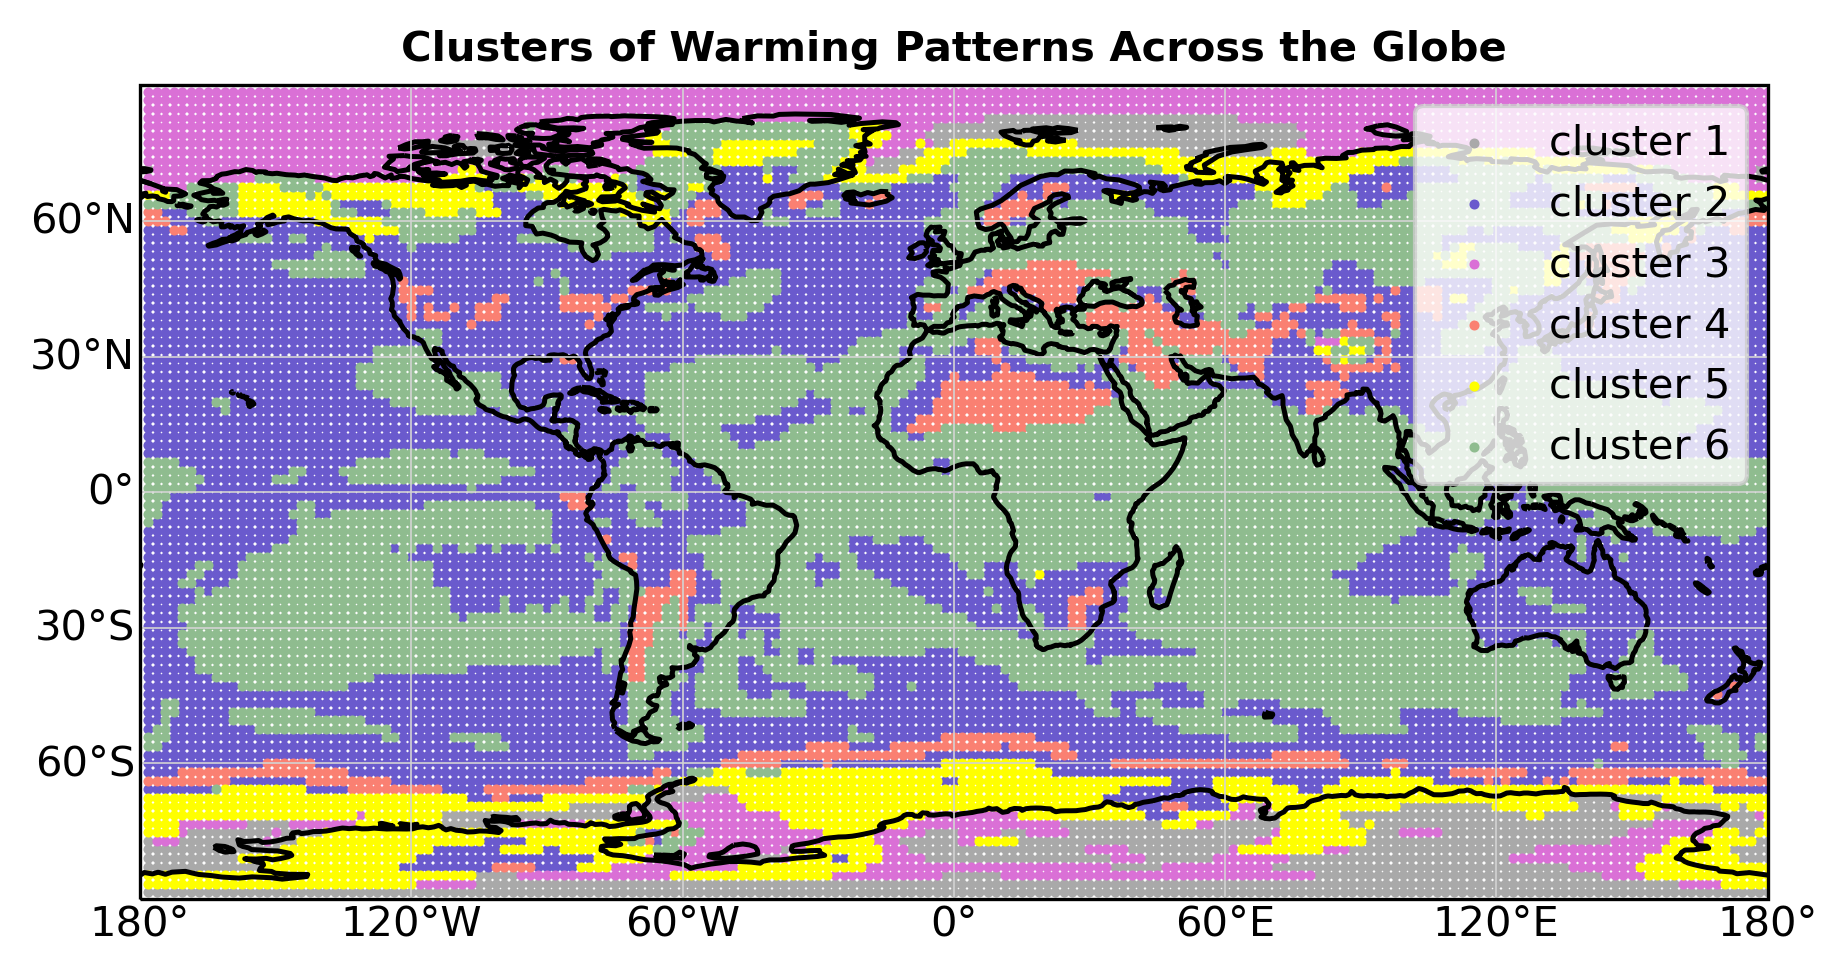

In [30]:
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cartopy.feature as cfeature

fig = plt.figure(figsize=(7,4), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

ax.scatter(df1['longitude'],df1['latitude'],marker='o', s=2, c='darkgrey', label='cluster 1')
ax.scatter(df2['longitude'],df2['latitude'],marker='o',s=2,c='slateblue', label='cluster 2')
ax.scatter(df3['longitude'],df3['latitude'],marker='o',s=2,c='orchid', label='cluster 3')
ax.scatter(df4['longitude'],df4['latitude'],marker='o',s=2,c='salmon', label='cluster 4')
ax.scatter(df5['longitude'],df5['latitude'],marker='o',s=2,c='yellow', label='cluster 5')
ax.scatter(df6['longitude'],df6['latitude'],marker='o',s=2,c='darkseagreen', label='cluster 6')
ax.coastlines(linewidth=1.2)
ax.legend()
plt.title('Clusters of Warming Patterns Across the Globe', fontsize=10, fontweight='bold')

# Add gridlines with labels
gl = ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True, linewidth=0.4)
gl.top_labels = False
gl.right_labels = False

### Obtaining the Area of Each Cluster

In [25]:
# obtain the area of each cluster 
import math
L = slopes.x[1] - slopes.x[0]
w = (slopes.y[1] - slopes.y[0])/2
area = [0] * n_clusters
for clus_no in range(n_clusters):
    df_clus = df.loc[df['labels_6c']==clus_no]
    for k in range(len(df_clus)):
        area[clus_no] += (L/360) * (math.sin(math.radians(df_clus.latitude.values[k] - w)) 
                                    - math.sin(math.radians(df_clus.latitude.values[k] + w)))

Text(0.5, 1.0, 'Area of Clusters')

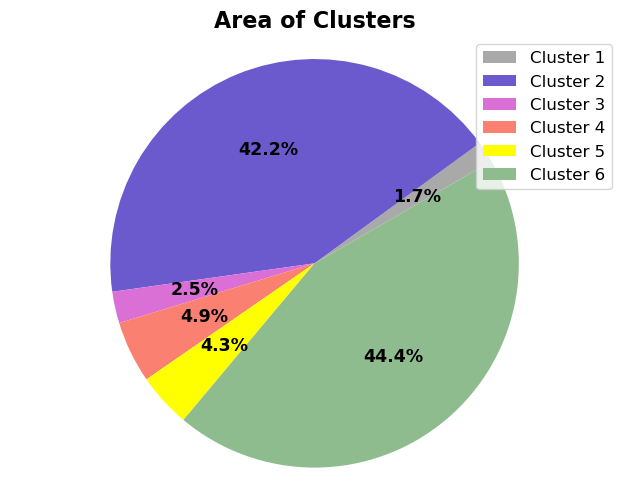

In [26]:
# pie chart showing area of each cluster
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
sizes = [area[0], area[1], area[2], area[3], area[4], area[5]]
colors = ['darkgrey', 'slateblue', 'orchid', 'salmon', 'yellow', 'darkseagreen']

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=30, textprops={'color':'black', 'weight':'bold', 'fontsize':12.5})
plt.legend(labels, loc='upper right', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.title('Area of Clusters', fontsize=16, fontweight='bold')